# Advertising Sales Channel Prediction

### Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Importing the dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
# Checking for the shape
df.shape

(200, 5)

We have 200 rows and 5 columns wherin sales is target variable. The first column is unnamed and consist of serial numbers which will not be useful for predictive analysic and hence can be removed.

In [13]:
# Removing unwanted columns
df=df.drop(columns=['Unnamed: 0'])

In [14]:
df.shape

(200, 4)

In [15]:
# Checking for the null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values

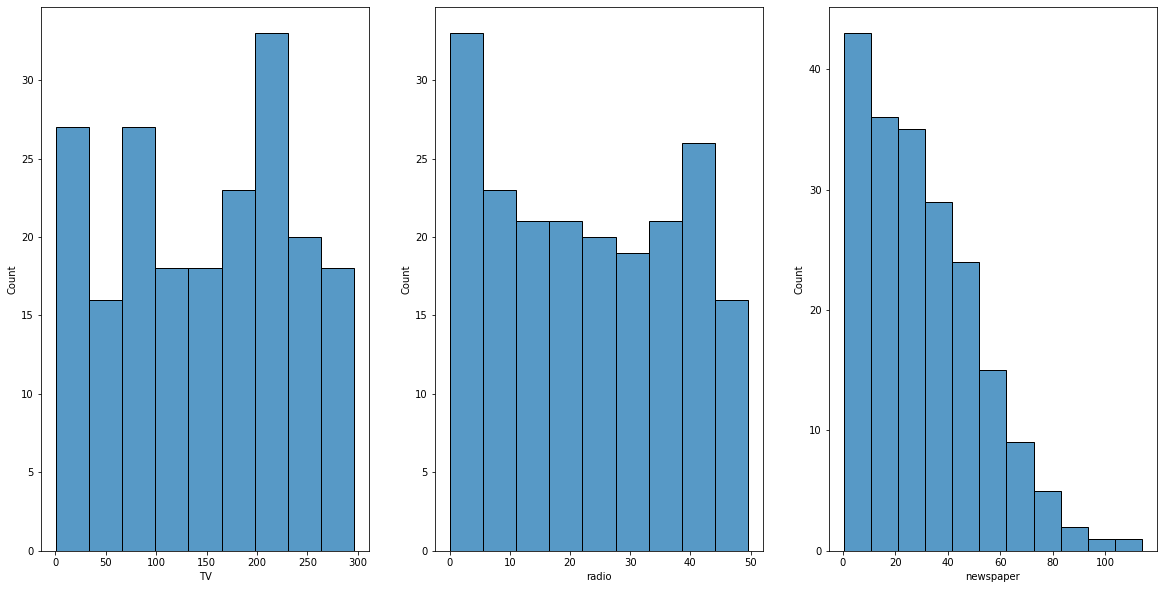

In [23]:
# Looking at the data distribution for each column
import seaborn as sns
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.show()
    



The data is not normally distributed for each column.The skewness in data observed for newspaper

In [35]:
# Statistics of dataset
df.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The highest sales generated is generated from the TV i.e 296.4 followed by newspaper at 114 and comparatively small sales has been generated by radio.
Looking at the mean values the sales is more through TV advertisement.

# Correlation

In [42]:
corr=df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

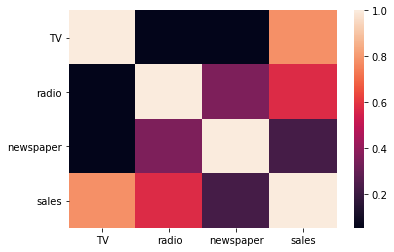

In [43]:
sns.heatmap(corr)

All the features are positively correlated with the sales value except for the newpaper where the corr value is low.TV has the highest correlational value

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

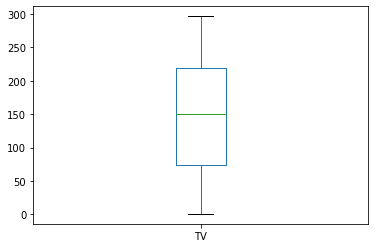

In [46]:
# Checking for the outliers

df['TV'].plot(kind='box')

<AxesSubplot:>

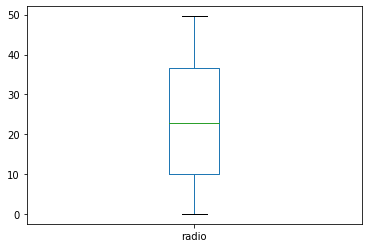

In [47]:
df['radio'].plot(kind='box')

<AxesSubplot:>

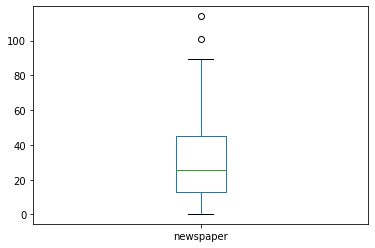

In [48]:
df['newspaper'].plot(kind='box')

It can be seen that outliers are present in newspaper.

In [49]:
# Removing the outliers using z score method
from scipy.stats import zscore

In [57]:
z=np.abs(zscore(df))

In [58]:
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [59]:
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [60]:
df_z1 =df[(z<3).all(axis=1)]

In [61]:
df_z1.shape

(198, 4)

<AxesSubplot:>

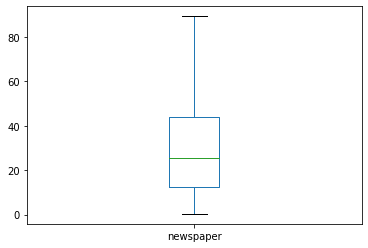

In [63]:
df_z1['newspaper'].plot(kind='box')

Outliers have been removed in the above step

In [65]:
# calculating the Percentage loss

p_loss=(200-198)/200*100
p_loss


1.0

# Feature Selection

In [68]:
x=df_z1.drop(columns=['sales'])
y=df_z1['sales']

In [66]:
df_z1.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [69]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [70]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Training the model

In [71]:
# Scaling the data using standard scalar
x=StandardScaler().fit_transform(x)
print(x)

[[ 0.97869734  0.98952135  1.93299778]
 [-1.19901165  1.09070498  0.75131275]
 [-1.51933199  1.53591293  1.93790103]
 [ 0.05645636  1.22561648  1.40834924]
 [ 0.40024339 -0.83178391  1.40344598]
 [-1.61906543  1.73828018  2.2173867 ]
 [-1.04647815  0.6522426  -0.30779084]
 [-0.31079737 -0.23817331 -0.89127846]
 [-1.62023876 -1.41864895 -1.41102374]
 [ 0.62317696 -1.38492107 -0.42056576]
 [-0.94557138 -1.16906267 -0.27346804]
 [ 0.79800381  0.05863199 -1.26392602]
 [-1.44189191  0.80739083  1.77119028]
 [-0.57714432 -1.04764232 -1.10702179]
 [ 0.67363035  0.65898817  0.79544207]
 [ 0.57155024  1.65733328  1.13376683]
 [ 1.58061798  1.1109417   1.27596129]
 [-0.90919801 -0.17746313 -0.56276022]
 [ 0.0071763   0.05188642 -0.52353416]
 [ 0.84141719  0.30821827  1.15828311]
 [ 1.06435076 -1.21628169 -0.30779084]
 [-1.56626537 -0.48775959  0.97195933]
 [ 0.95757732 -0.42030384 -0.17540289]
 [-0.99015809 -0.71036356 -0.56276022]
 [ 1.36355108 -1.32421089 -0.50392113]
 [-0.04445042  0.41614747

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=256)

x_train.shape

In [76]:
y_train

194    17.3
32      9.6
83     13.6
60      8.1
41     17.1
       ... 
90     11.2
66      9.5
169    15.0
188    15.9
162    14.9
Name: sales, Length: 148, dtype: float64

In [78]:
x_test.shape

(50, 3)

In [80]:
y_test.shape

(50,)

## Finding the best model

In [81]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lg=lr.predict(x_test)
r2score=r2_score(y_test,pred_lg)
cvsscore=cross_val_score(LinearRegression(),x_train,y_train,cv=2).mean()
print(r2score)
print(cvsscore)

In [82]:
print(r2score)
print(cvsscore)

0.8122933822183802
0.9088612173105721


In [83]:
# Lasso
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
r2score=r2_score(y_test,pred_ls)
cvsscore=cross_val_score(Lasso(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.7762355260930551
0.831339759575447
-0.05510423348239191


In [84]:
# Ridge
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
r2score=r2_score(y_test,pred_rd)
cvsscore=cross_val_score(Ridge(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.8125203142186108
0.8971340020459776
-0.08461368782736678


In [85]:
# ElasticNet
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred_en=en.predict(x_test)
r2score=r2_score(y_test,pred_en)
cvsscore=cross_val_score(ElasticNet(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.691330812493328
0.7367974223268143
-0.04546660983348638


In [86]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar=AdaBoostRegressor()
ar.fit(x_train,y_train)
pred_ad=ar.predict(x_test)
r2score=r2_score(y_test,pred_ad)
cvsscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.9487148927287299
0.9442961978424044
0.004418694886325514


In [87]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor(n_estimators=88)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
r2score=r2_score(y_test,pred_rg)
cvsscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.9712267987021596
0.9675068181755587
0.00371998052660083


# RandomForestRegressor gives the best score of R2 as well as cross validation score

## R2 score as 97%

# Saving the file 

In [90]:
import pickle
filename="Advertising Sales Channel Prediction"
pickle.dump(rg,open(filename,"wb"))

In [101]:
rg.predict([['100','3','10']])

array([25.95909091])

In [102]:
rg.predict(x_test)

array([10.375     , 23.475     , 13.93863636, 12.11818182,  8.78636364,
        7.77840909, 18.59204545, 15.39318182, 15.67840909, 17.18409091,
        6.39886364, 11.69090909, 18.06590909, 22.99659091, 11.19886364,
        6.09659091,  9.33409091,  8.09886364,  9.98522727, 15.42272727,
        9.38409091, 19.60227273,  7.44318182, 12.31704545, 14.16363636,
        8.11363636, 15.12840909,  5.32613636, 20.13295455, 14.93295455,
       11.725     , 10.76704545, 18.89659091, 12.13295455, 21.54431818,
       11.37840909, 10.02386364,  9.54545455, 16.21363636, 10.76931818,
        9.80113636, 14.95340909, 11.58409091, 18.33409091, 10.91022727,
        7.10681818, 15.07159091, 18.86818182, 11.84204545, 12.49886364])